# IMPORTANDO BIBLIOTECAS E DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.patches as mpatches

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')

In [3]:
df.head()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1
2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,0,1
4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1


In [4]:
pd.DataFrame(data = df.city.unique(), columns = ['Cidades'])

,Cidades
0,São Paulo/SP
1,TOTAL
2,Barra Mansa/RJ
3,Feira de Santana/BA
4,INDEFINIDA/ES
...,...
1067,Pilar do Sul/SP
1068,Pontal/SP
1069,Rincão/SP
1070,São Tomás de Aquino/MG


# FILTRANDO OS DADOS DOS ESTADOS

In [5]:
agrupado = df.groupby('city').sum()['totalCases'].reset_index()
agrupado.sort_values(by=['totalCases'], inplace=True)
agrupado = agrupado.query('city != "TOTAL"')
agrupado = agrupado[~agrupado["city"].str.contains("INDEFINIDA")].reset_index().drop(columns='index')
agrupado.tail(15)

,city,totalCases
1034,Guarulhos/SP,1723
1035,Natal/RN,1748
1036,São Bernardo do Campo/SP,1955
1037,Florianópolis/SC,2142
1038,São Luís/MA,3208
1039,Curitiba/PR,3604
1040,Recife/PE,4749
1041,Salvador/BA,4777
1042,Porto Alegre/RS,4929
1043,Belo Horizonte/MG,5186


In [6]:
nao_especificada = df.groupby('city').sum()['totalCases'].reset_index()
nao_especificada.sort_values(by=['totalCases'], inplace=True)
nao_especificada = nao_especificada[nao_especificada["city"].str.contains("INDEFINIDA")].reset_index().drop(columns='index')
nao_especificada = nao_especificada.query('totalCases > 0')
novo_ne = nao_especificada["city"].str.split("/", n = 1, expand = True) 
nao_especificada["ESTADO"]= novo_ne[1] 
nao_especificada.drop(columns =["city"], inplace = True) 
nao_especificada.columns = ['NaoEspecificadas', 'Estado']
nao_especificada

,NaoEspecificadas,Estado
0,2,MS
1,3,PI
2,11,AC
3,15,PA
4,16,PB
5,22,RO
6,37,MT
7,41,RS
8,66,BA
9,81,AP


In [7]:
todas_cidades = agrupado.city.to_numpy()
todas_cidades

array(['São Miguel do Guamá/PA', 'Matias Barbosa/MG',
       'Chapada dos Guimarães/MT', ..., 'Fortaleza/CE',
       'Rio de Janeiro/RJ', 'São Paulo/SP'], dtype=object)

In [0]:
df.columns = ['data', 'pais', 'estado', 'cidade', 'ibgeID', 'novasMortes', 'mortes', 'novosCasos', 'totalCasos']

# CRIANDO O DATASET TRATADO

In [0]:
def cria_df(situacao, corte):

  novo_df = pd.DataFrame()
  cont_dfs = []
  for cidade in todas_cidades: 
    df_cidades = df.loc[df.cidade == cidade, : ]
    df_cidades = df_cidades.groupby('data').sum()[situacao].reset_index()
    df_cidades = df_cidades.loc[df_cidades[situacao] >= corte, : ]
    df_cidades = df_cidades.drop(columns='data')
    df_cidades.columns = [cidade]
    df_cidades = df_cidades.reset_index().drop(columns='index')

    cont_dfs = np.append(cont_dfs, int(df_cidades.count()[0]))
    max_dias = cont_dfs.max()



  for cidade in todas_cidades:
    df_cidades = df.loc[df.cidade == cidade, : ]
    df_cidades = df_cidades.groupby('data').sum()[situacao].reset_index()
    df_cidades = df_cidades.loc[df_cidades[situacao] >= corte, : ]
    df_cidades = df_cidades.drop(columns='data')
    df_cidades.columns = [cidade]
    df_cidades = df_cidades.reset_index().drop(columns='index')

    qtd_dias = df_cidades[cidade].count()
    dias = list(range(qtd_dias,int(max_dias)))
    for dia in dias:
      df_cidades.loc[dia] = [0]

        
    novo_df = pd.concat([novo_df, df_cidades], ignore_index=False, axis=1)
    novo_df.replace(0, np.nan, inplace=True)

    corte_ = corte
  return novo_df

In [10]:
dataframe_estados = cria_df('totalCasos', 30)
dataframe_estados

,São Miguel do Guamá/PA,Matias Barbosa/MG,Chapada dos Guimarães/MT,Alto Rio Novo/ES,Camaquã/RS,Goianá/MG,Araxá/MG,Guaranésia/MG,Maués/AM,Cajuru/SP,Nhandeara/SP,Ouriçangas/BA,Uruaçu/GO,Trajano de Moraes/RJ,Cataguases/MG,Mairinque/SP,Forquilha/CE,Rincão/SP,Pilar do Sul/SP,Bariri/SP,Várzea Paulista/SP,Pirenópolis/GO,Ituporanga/SC,Jutaí/AM,Mongaguá/SP,Lins/SP,Passos/MG,São Tomás de Aquino/MG,Conchas/SP,Icatu/MA,Leme/SP,Venâncio Aires/RS,Ubatuba/SP,Graça/CE,Jataizinho/PR,Canavieiras/BA,Macatuba/SP,Salinópolis/PA,Paraúna/GO,Capanema/PA,...,Nova Iguaçu/RJ,Cuiabá/MT,Juiz de Fora/MG,Londrina/PR,Blumenau/SC,João Pessoa/PB,Taboão da Serra/SP,São José dos Campos/SP,Boa Vista/RR,Serra/ES,Mossoró/RN,São Caetano do Sul/SP,Rio Branco/AC,Campinas/SP,Campo Grande/MS,Volta Redonda/RJ,Vitória/ES,Macapá/AP,Vila Velha/ES,Osasco/SP,Santos/SP,Goiânia/GO,Belém/PA,Santo André/SP,Niterói/RJ,Guarulhos/SP,Natal/RN,São Bernardo do Campo/SP,Florianópolis/SC,São Luís/MA,Curitiba/PR,Recife/PE,Salvador/BA,Porto Alegre/RS,Belo Horizonte/MG,Manaus/AM,Brasília/DF,Fortaleza/CE,Rio de Janeiro/RJ,São Paulo/SP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.0,38.0,30.0,30.0,52.0,30.0,34.0,30.0,31.0,31.0,43.0,30.0,31.0,50.0,36.0,43.0,34.0,35.0,31.0,33.0,37.0,33.0,42.0,40.0,31.0,35.0,34.0,33.0,30.0,30.0,31.0,30.0,33.0,35.0,30.0,31.0,34.0,63.0,55.0,44
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,38.0,30.0,37.0,52.0,40.0,39.0,48.0,36.0,33.0,43.0,32.0,34.0,72.0,37.0,44.0,36.0,47.0,35.0,43.0,55.0,33.0,45.0,48.0,36.0,52.0,34.0,44.0,40.0,51.0,31.0,30.0,37.0,38.0,30.0,45.0,42.0,76.0,56.0,44
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,43.0,30.0,38.0,55.0,59.0,41.0,61.0,36.0,41.0,59.0,33.0,34.0,83.0,38.0,45.0,39.0,95.0,36.0,51.0,66.0,35.0,49.0,51.0,37.0,62.0,36.0,52.0,50.0,68.0,34.0,31.0,45.0,41.0,60.0,52.0,87.0,116.0,56.0,62
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,43.0,37.0,47.0,59.0,64.0,45.0,77.0,36.0,53.0,59.0,36.0,34.0,100.0,38.0,45.0,43.0,97.0,44.0,57.0,72.0,39.0,75.0,59.0,39.0,62.0,42.0,59.0,58.0,78.0,40.0,33.0,54.0,47.0,87.0,63.0,108.0,151.0,99.0,62
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,50.0,39.0,54.0,61.0,78.0,50.0,81.0,42.0,64.0,63.0,38.0,36.0,100.0,43.0,55.0,62.0,146.0,46.0,62.0,75.0,42.0,100.0,70.0,47.0,63.0,48.0,70.0,60.0,82.0,60.0,38.0,60.0,87.0,90.0,75.0,117.0,170.0,168.0,145
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,58.0,42.0,59.0,61.0,86.0,59.0,85.0,45.0,76.0,63.0,38.0,36.0,106.0,43.0,58.0,64.0,171.0,50.0,69.0,87.0,43.0,111.0,76.0,57.0,74.0,56.0,77.0,71.0,86.0,66.0,46.0,78.0,103.0,96.0,105.0,138.0,196.0,212.0,156
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0,60.0,46.0,61.0,65.0,103.0,67.0,85.0,56.0,80.0,63.0,39.0,36.0,107.0,43.0,58.0,65.0,204.0,53.0,71.0,109.0,50.0,114.0,72.0,62.0,119.0,77.0,81.0,78.0,121.0,71.0,50.0,81.0,107.0,118.0,131.0,161.0,224.0,276.0,214
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0,64.0,51.0,61.0,68.0,103.0,72.0,85.0,68.0,97.0,63.0,50.0,38.0,112.0,44.0,63.0,77.0,211.0,62.0,84.0,130.0,65.0,147.0,74.0,63.0,154.0,77.0,89.0,91.0,152.0,74.0,52.

# PLOTANDO GRÁFICOS

In [11]:
max_cidade = []
for cidade in todas_cidades:  
  max_cidade = np.append(max_cidade, dataframe_estados[cidade].max())

max_cidade = pd.DataFrame(data=max_cidade, columns=['maximo'])
max_cidade['cidades'] = todas_cidades
max_cidade.sort_values(by=['maximo'], inplace=True, ascending=False)
max_cidade

,maximo,cidades
1048,6705.0,São Paulo/SP
1047,2322.0,Rio de Janeiro/RJ
1046,1686.0,Fortaleza/CE
1044,1106.0,Manaus/AM
1040,672.0,Recife/PE
...,...,...
970,NaN,Lauro de Freitas/BA
973,NaN,São José/SC
976,NaN,Maringá/PR
978,NaN,Braço do Norte/SC


In [0]:
from matplotlib.ticker import FormatStrFormatter

In [0]:
 def gera_cidades(com_destaque): 
  sem_destaque = todas_cidades
  acha_index = np.in1d(sem_destaque, com_destaque).nonzero()[0]
  sem_destaque = np.delete(sem_destaque, acha_index)
  return sem_destaque

In [0]:
hoje = date.today()
data_hoje = hoje.strftime("%B %d, %Y")

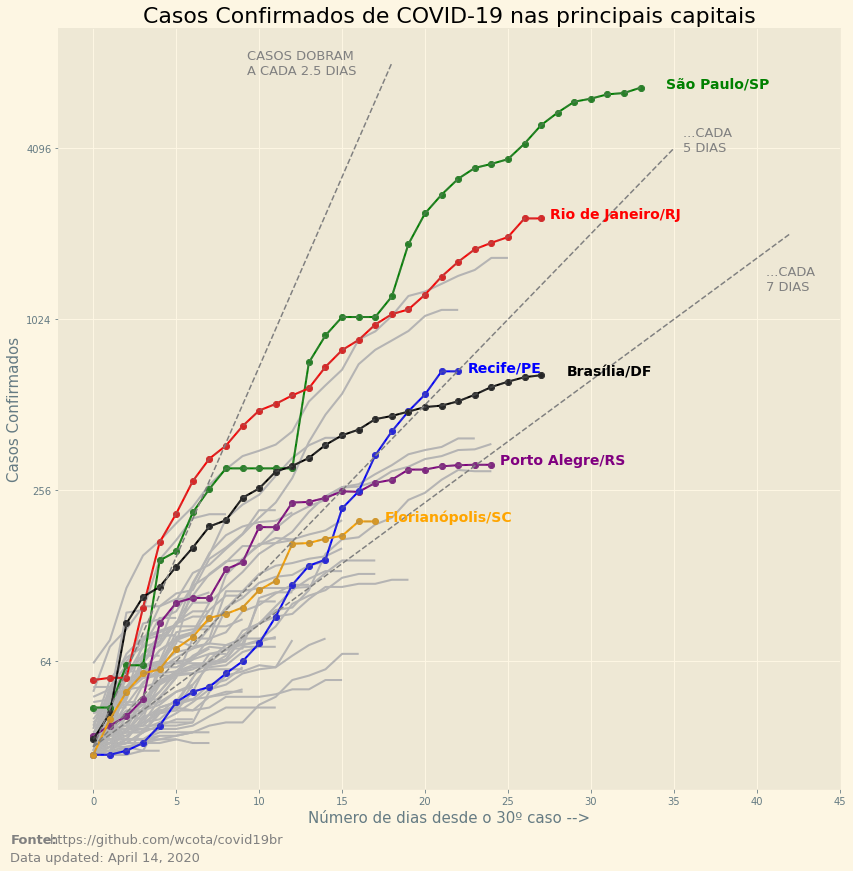

In [24]:
com_destaque = ['São Paulo/SP', 'Rio de Janeiro/RJ', 'Porto Alegre/RS', 'Recife/PE', 'Brasília/DF', 'Florianópolis/SC']
cidades_sem_destaque = gera_cidades(com_destaque)

plt.figure(figsize=(14, 14))
plt.style.use('Solarize_Light2')
i=0
c=0

max_cidade_f = max_cidade.query('cidades != @com_destaque').reset_index().drop(columns='index')
max_cidade_c = max_cidade.query('cidades == @com_destaque').reset_index().drop(columns='index')

# plotando cidades sem destaques
for cidade in cidades_sem_destaque:  
  plt.plot(dataframe_estados[cidade], label=cidade, color='#CCCBCA')
  plt.plot(dataframe_estados[cidade], color='grey', alpha=0.3)
  plt.yscale('log', basey=2)
  plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.d'))

# plotando cidades com destaques
cores = ['green', 'red', 'purple', 'blue', 'black', 'orange', 'brown']
for cidade in com_destaque:  
  plt.plot(dataframe_estados[cidade], 'o-',label=cidade, color=cores[c])
  plt.plot(dataframe_estados[cidade],'o--', color='grey', alpha=0.3)
  plt.yscale('log', basey=2)
  plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.d'))
  plt.title('Casos Confirmados de COVID-19 nas principais capitais', fontsize=22, pad=6)
  plt.grid(True)
  plt.xlabel(f'Número de dias desde o 30º caso -->', fontsize=15)
  plt.ylabel('Casos Confirmados', fontsize=15)
  #if cidade in ['São Paulo/SP', 'Brasília/DF']:
  plt.text(x=((dataframe_estados[cidade].loc[dataframe_estados[cidade] == max_cidade_c.loc[max_cidade_c['cidades'] == cidade].reset_index().drop(columns='index').maximo[i]]).index[0] + 1.55), y=(max_cidade_c.loc[max_cidade_c['cidades'] == cidade].reset_index().drop(columns='index').maximo[i])+0.5, s=cidade, fontsize=14, color=cores[c], fontweight='bold')

  c += 1
plt.text(x=-5, y=14.66, s='Fonte:', fontsize=13, color='grey', fontweight='bold')
plt.text(x=-2.6, y=14.66,s= 'https://github.com/wcota/covid19br', fontsize=13, color='grey')
plt.text(x=-5, y=12.7,s= f'Data updated: {data_hoje}', fontsize=13, color='grey')
plt.plot([0,35], [32,4096], '--', color='grey', linewidth=1.5) #dobra a cada 5 dias
plt.plot([0,18], [32,8192], '--', color='grey', linewidth=1.5) #dobra a cada 2.5 dias
plt.plot([0,42], [32,2048], '--', color='grey', linewidth=1.5) #dobra a cada 7 dias
plt.text(x=9.25, y=7500, s='CASOS DOBRAM \nA CADA 2.5 DIAS', fontsize=13, color='grey')
plt.text(x=35.55, y=4000, s='...CADA \n5 DIAS', fontsize=13, color='grey')
plt.text(x=40.55, y=1300, s='...CADA \n7 DIAS', fontsize=13, color='grey')
plt.xticks(range(0, int(dataframe_estados.index.max()+15), 5))


plt.savefig('casos_confirmados_cidades_ncapitais.png')